In [1]:
#Let's import all the Python modules necessary for this study and tell matplotlib to generate interactive javascript plots.
# Examples & Explanations: https://github.com/rdemaria/pytimber/blob/master/examples/pyTimberExamples.ipynb
%matplotlib notebook
import pytimber
import time
import matplotlib.pyplot as plt
import datetime
import numpy as np
from scipy import special
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
# Fit function

def erfunc(x, mFL, a, b, c):
    return mFL*special.erf((x-a)/(b*np.sqrt(2))) + c

def pol1(x, a, b):
    return a*x+b

def expo(x, a, b, c):
    return np.exp(a*x+b) + c

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [3]:
#We now open the connection to the database:
db = pytimber.LoggingDB()

In [4]:
db.search("XRP.51779%LVDT%")  #RP0

[u'XRP.51779.H1:LVDTPOSITION', u'XRP.51779.H2:LVDTPOSITION']

In [5]:
db.search("XRPH.51937%LVDT%") #RP1

[u'XRPH.51937.H1:MEAS_LVDT', u'XRPH.51937.H2:MEAS_LVDT']

In [6]:
db.search("TECS.51652%LVDT%") #CR1&2

[u'TECS.51652:AXISALVDTANGLE',
 u'TECS.51652:AXISALVDTPOSITION',
 u'TECS.51652:AXISBLVDTANGLE',
 u'TECS.51652:AXISBLVDTPOSITION']

In [7]:
db.search("TECS.51799%LVDT%") #CR3&4

[u'TECS.51799.LINDW:LVDTPOSITION',
 u'TECS.51799.LINDW:MEAS_LVDT',
 u'TECS.51799.LINUP:LVDTPOSITION',
 u'TECS.51799.LINUP:MEAS_LVDT',
 u'TECS.51799:CRYSTALALVDTANGLE',
 u'TECS.51799:CRYSTALBLVDTANGLE']

In [8]:
db.search("TACW.51797%LVDT%") #Absorber

[u'TACW.51797.LINDW:LVDTPOSITION', u'TACW.51797.LINUP:LVDTPOSITION']

In [9]:
db.search("TACW.51998%") #Absorber

[u'TACW.51998:POSITION', u'TACW.51998:SW_IN', u'TACW.51998:SW_OUT']

In [10]:
db.search("TCSM.51934%LVDT%") #LHC Collimator

[u'TCSM.51934:MEAS_LVDT_GD',
 u'TCSM.51934:MEAS_LVDT_GU',
 u'TCSM.51934:MEAS_LVDT_LD',
 u'TCSM.51934:MEAS_LVDT_LU',
 u'TCSM.51934:MEAS_LVDT_RD',
 u'TCSM.51934:MEAS_LVDT_RU']

In [11]:
db.search("BLMI.LSS5%LOSSES") #Losses

[u'BLMI.LSS5.1:LOSSES',
 u'BLMI.LSS5.2:LOSSES',
 u'BLMI.LSS5.3:LOSSES',
 u'BLMI.LSS5.4:LOSSES',
 u'BLMI.LSS5.5:LOSSES',
 u'BLMI.LSS5.6:LOSSES',
 u'BLMI.LSS5.7:LOSSES',
 u'BLMI.LSS5.8:LOSSES']

In [12]:
db.search("%SPS.BPMCOL.BOX1.HOR%HORLINEARPOS%") #BPM

[u'SPS.BPMCOL.BOX1.HOR_DOWN:HORLINEARPOS',
 u'SPS.BPMCOL.BOX1.HOR_UP:HORLINEARPOS']

In [13]:
db.search("%CpFM%") #CpFM

[u'UA9CPFMWAVECATCHER:AMPLITUDE',
 u'UA9CPFMWAVECATCHER:BASELINE',
 u'UA9CPFMWAVECATCHER:CHANNELNAMES',
 u'UA9CPFMWAVECATCHER:CHANNELTSTAMP',
 u'UA9CPFMWAVECATCHER:CHARGE',
 u'UA9CPFMWAVECATCHER:COUNTERNAMES',
 u'UA9CPFMWAVECATCHER:COUNTERTSTAMP',
 u'UA9CPFMWAVECATCHER:COUNTERVALUES',
 u'UA9CPFMWAVECATCHER:FALLEDGETIME',
 u'UA9CPFMWAVECATCHER:PEAKS',
 u'UA9CPFMWAVECATCHER:PEAKTIME',
 u'UA9CPFMWAVECATCHER:RISEEDGETIME']

In [14]:
#Position
RP0I_position='XRP.51779.H2:LVDTPOSITION'
RP0E_position='XRP.51779.H1:LVDTPOSITION'
RP1I_position='XRPH.51937.H2:MEAS_LVDT'
CRY1_position='TECS.51652:AXISALVDTPOSITION'
CRY2_position='TECS.51652:AXISBLVDTPOSITION'
CRY3_position='TECS.51799.LINUP:LVDTPOSITION'
CRY4_position='TECS.51799.LINDW:LVDTPOSITION'
TACW_DW_position='TACW.51797.LINDW:LVDTPOSITION'
TACW_UP_position='TACW.51797.LINUP:LVDTPOSITION'
LHC_RDW_position='TCSM.51934:MEAS_LVDT_RD'
LHC_RUP_position='TCSM.51934:MEAS_LVDT_RU'
TAL_position='TACW.51998:POSITION'

#Angle
CRY1_angle='TECS.51652:AXISALVDTANGLE'
CRY2_angle='TECS.51652:AXISBLVDTANGLE'
CRY3_angle='TECS.51799:CRYSTALALVDTANGLE'
CRY4_angle='TECS.51799:CRYSTALBLVDTANGLE'

#Losses
BLM1='BLMI.LSS5.1:LOSSES'
BLM2='BLMI.LSS5.2:LOSSES'
BLM3='BLMI.LSS5.3:LOSSES'
BLM4='BLMI.LSS5.4:LOSSES'
BLM5='BLMI.LSS5.5:LOSSES'
BLM6='BLMI.LSS5.6:LOSSES'
BLM7='BLMI.LSS5.7:LOSSES'
BLM8='BLMI.LSS5.8:LOSSES'

#BPM
BPM_UP='SPS.BPMCOL.BOX1.HOR_UP:HORLINEARPOS'
BPM_DW='SPS.BPMCOL.BOX1.HOR_DOWN:HORLINEARPOS'

#CpFM
CPFM_position='TQCD.51991:LVDTPOSITION'

#SPS FILL-2
# time_ini='2018-09-17 08:00:00'
# time_fin='2018-09-17 12:30:00'

#SPS FILL-1
# time_ini='2018-09-17 12:30:00'
# time_fin='2018-09-17 16:30:00'

#SPS FILL0
# time_ini='2018-09-17 16:30:00'
# time_fin='2018-09-17 18:30:00'

#SPS FILL1
# time_ini='2018-09-17 18:30:00'
# time_fin='2018-09-17 21:20:00'

#SPS FILL2
# time_ini='2018-09-17 21:20:00'
# time_fin='2018-09-18 01:56:00'

#SPS FILL3
# time_ini='2018-09-18 01:56:00'
# time_fin='2018-09-18 06:00:00'

#SPS FILL3 LHC COLL SCAN 1
time_ini='2018-09-18 04:55:36'
# time_fin='2018-09-18 05:10:00'

#SPS FILL3 LHC COLL SCAN 2
# time_ini='2018-09-18 05:16:40'
time_fin='2018-09-18 05:26:20'


In [15]:
data=db.get([
    RP0I_position,
#     RP0E_position,
    RP1I_position,
#     CRY1_position,
    CRY2_position,
    CRY3_position,
#     CRY4_position,
#     CRY1_angle,
    CRY2_angle,
    CRY3_angle,
#     CRY4_angle,
    TACW_DW_position,
    TAL_position,
#     TACW_UP_position,
    LHC_RDW_position,
#     LHC_RUP_position,
    BLM1,
    BLM2,
#     BLM3,
    BLM4,
#     BLM5,
#     BLM6,
#     BLM7,
#     BLM8
#     CPFM_position
],time_ini,time_fin)

<IPython.core.display.Javascript object>


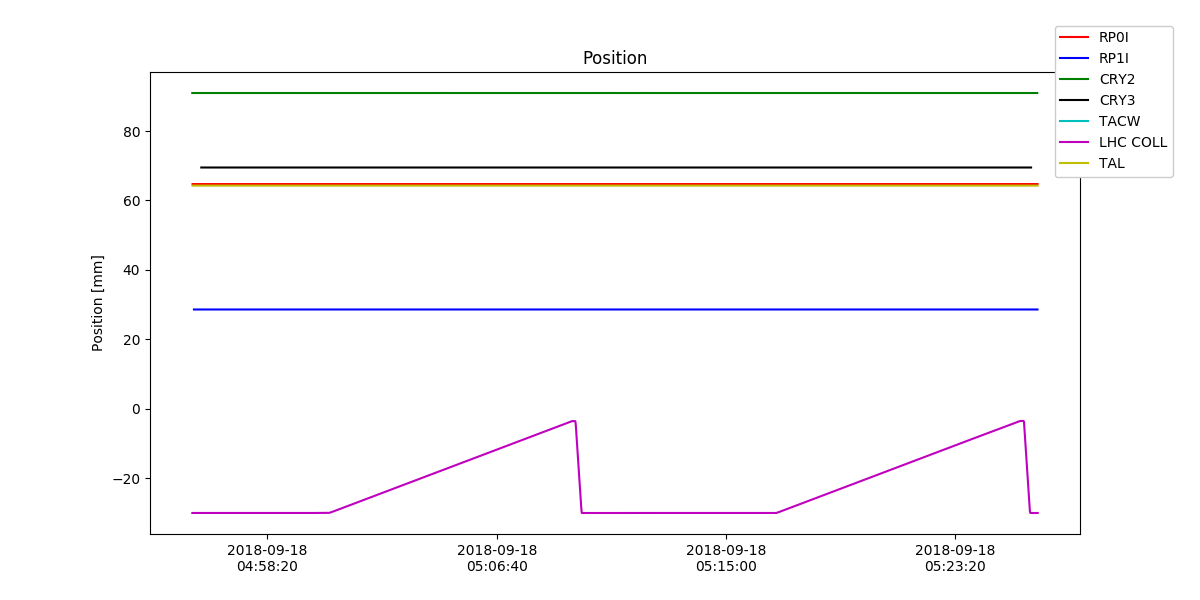

In [16]:
#Create figure
plt.figure(figsize=(12,6))

tt,vv=data[RP0I_position]
plt.plot(tt,vv,'-r',label='RP0I')

tt,vv=data[RP1I_position]
plt.plot(tt,vv,'-b',label='RP1I')

tt,vv=data[CRY2_position]
plt.plot(tt,vv,'-g',label='CRY2')

tt,vv=data[CRY3_position]
plt.plot(tt,vv,'-k',label='CRY3')

tt,vv=data[TACW_DW_position]
plt.plot(tt,vv,'-c',label='TACW')

tt,vv=data[LHC_RDW_position]
plt.plot(tt,vv,'-m',label='LHC COLL')

tt,vv=data[TAL_position]
plt.plot(tt,vv,'-y',label='TAL')


# tt,vv=data[CPFM_position]
# plt.plot(tt,vv,'-y',label='CpFM')

#Set axis and legend
plt.ylabel('Position [mm]')
leg=plt.legend(bbox_to_anchor=(1.1, 1.1), loc='upper right', borderaxespad=0.0)
# set the alpha value of the legend: it will be translucent
leg.get_frame().set_alpha(1.0)
plt.title('Position')
pytimber.set_xaxis_date()

# dat = np.array([tt,vv])
# dat = dat.T
# with open("crystal3_linearscan_fill3.dat", "w") as file_object:
#     np.savetxt(file_object, dat, fmt=['%20.d','%20.d'])
# file_object.close()

<IPython.core.display.Javascript object>


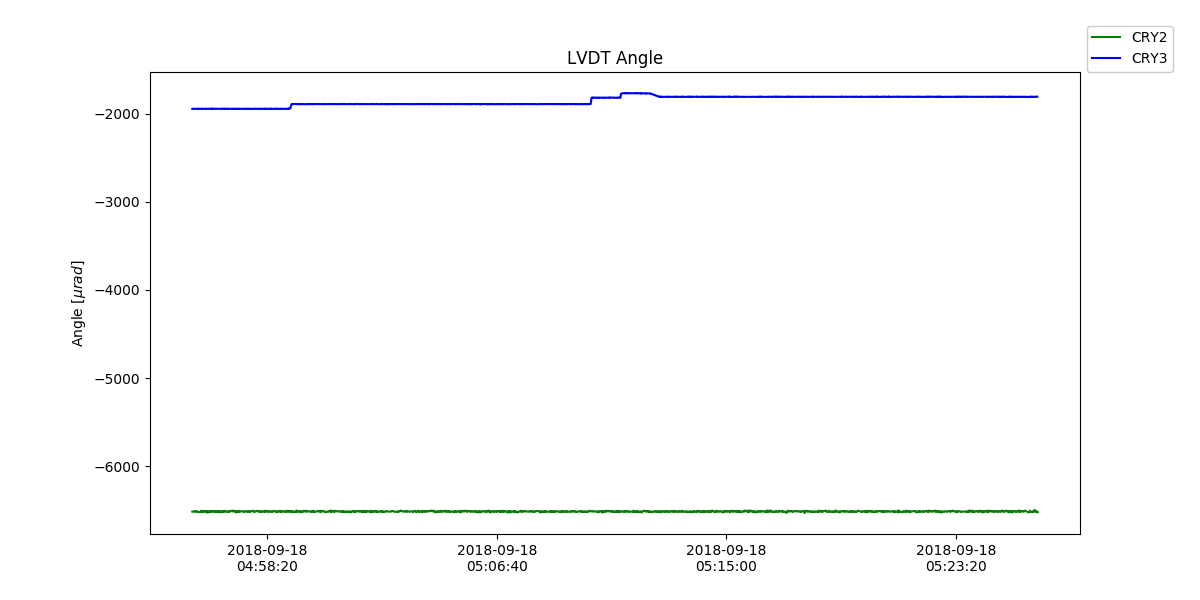

In [17]:
plt.figure(figsize=(12,6))

tt,vv=data[CRY2_angle]
plt.plot(tt,vv,'-g',label='CRY2')

tt,vv=data[CRY3_angle]
plt.plot(tt,vv,'-b',label='CRY3')

#Set axis and legend
plt.ylabel('Angle [$\mu rad$]')
leg=plt.legend(bbox_to_anchor=(1.1, 1.1), loc='upper right', borderaxespad=0.0)
# set the alpha value of the legend: it will be translucent
leg.get_frame().set_alpha(1.0)
plt.title('LVDT Angle')
pytimber.set_xaxis_date()

# dat = np.array([tt,vv])
# dat = dat.T
# with open("crystal2_angularscan.dat", "w") as file_object:
#     np.savetxt(file_object, dat, fmt=['%20.d','%20.d'])
# file_object.close()

<IPython.core.display.Javascript object>


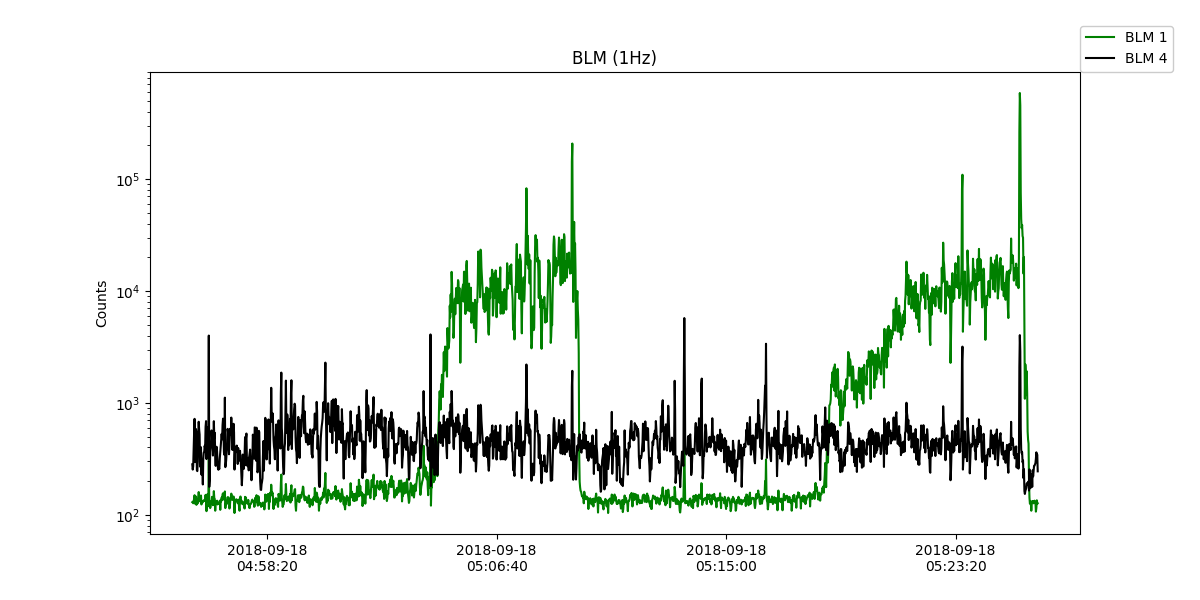

In [18]:
plt.figure(figsize=(12,6))

# BLM 1
tt, dd = data[BLM1]
dd=dd.T
vv=dd[8] #1Hz

plt.plot(tt,vv,'-g',label='BLM 1')

# BLM 4
tt, dd = data[BLM4]
dd=dd.T
vv=dd[8] #1Hz

plt.plot(tt,vv,'-k',label='BLM 4')


plt.title('BLM (1Hz)')
pytimber.set_xaxis_date()

#Set axis and legend
plt.ylabel('Counts')
leg=plt.legend(bbox_to_anchor=(1.1, 1.1), loc='upper right', borderaxespad=0.0)
# set the alpha value of the legend: it will be translucent
leg.get_frame().set_alpha(1.0)
plt.yscale('log')

<IPython.core.display.Javascript object>


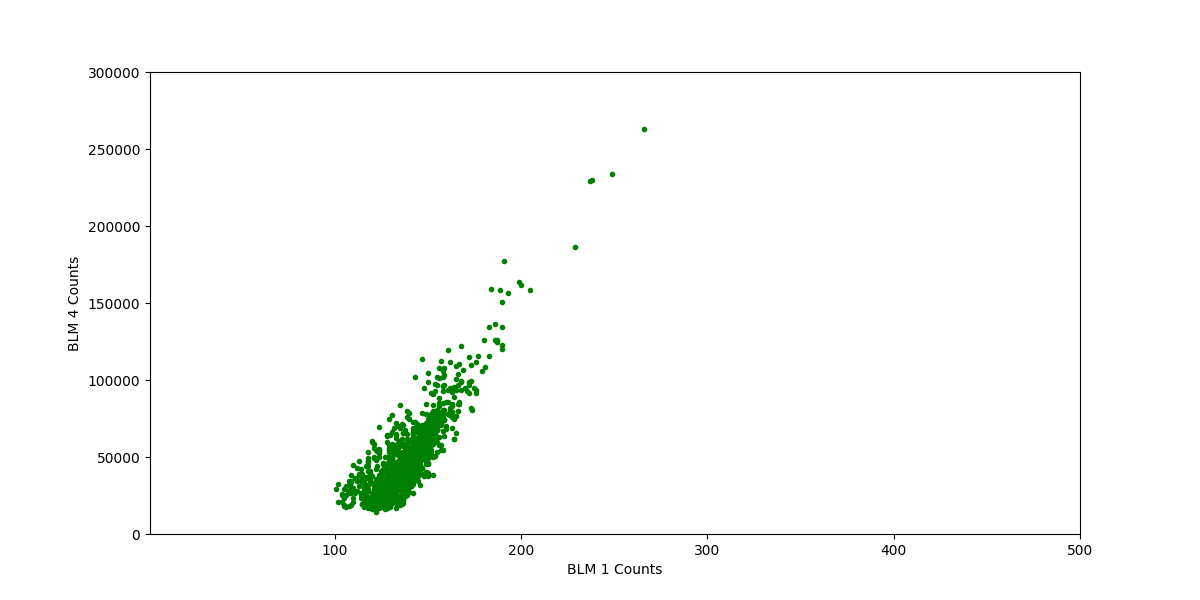

(1, 300000.0)

In [38]:
time_ini='2018-09-18 04:40:00'
time_fin='2018-09-18 05:01:00'
data_al=db.getAligned([BLM1,BLM4],time_ini,time_fin)

plt.figure(figsize=(12,6))

dd=data_al[BLM1]
dd=dd.T
vv1=dd[8] #1Hz

dd=data_al[BLM4]
dd=dd.T
vv8=100*dd[8] #1Hz

plt.plot(vv1,vv8,'.g',label='BLM4 vs BLM1')

plt.xlabel('BLM 1 Counts')
plt.ylabel('BLM 4 Counts')
plt.xlim(1,5e2)
plt.ylim(1,3e5)
# plt.xscale('log')
# plt.yscale('log')

<IPython.core.display.Javascript object>


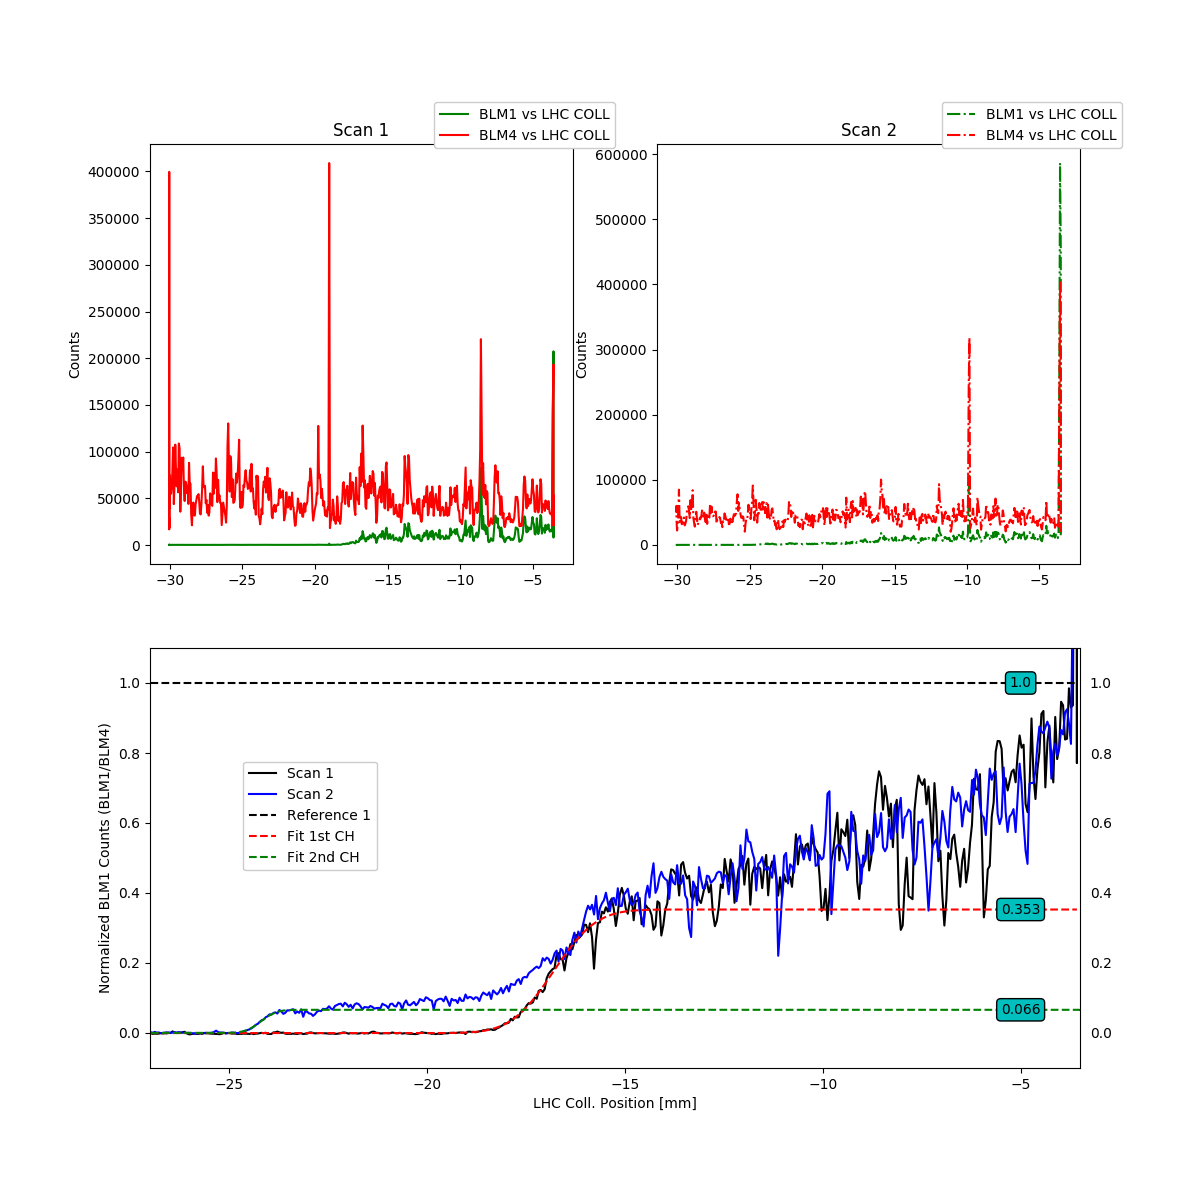

Fit 1st CH:
Mean =  -16.8  +/-  0.05
Sigma = 0.85  +/-  0.07
Fit 2nd CH:
Mean =  -24.2  +/-  0.03
Sigma = 0.31  +/-  0.04


In [20]:
plt.figure(figsize=(12,12))

#SPS FILL3 LHC COLL SCAN 1
time_ini='2018-09-18 04:55:36'
time_fin='2018-09-18 05:10:00'

data_al=db.getAligned([BLM1,BLM4,LHC_RDW_position],time_ini,time_fin)

vv=data_al[LHC_RDW_position]
length = len(vv)

dd=data_al[BLM1]
dd=dd.T
vv1=dd[8] #1Hz

dd=data_al[BLM4]
dd=dd.T
vv4=100*dd[8] #1Hz

blm1=vv1[:length-30]
blm4=vv4[:length-30]
coll_scan1=vv[:length-30]

blm1_norm_scan1=blm1/blm4

plt.subplot(2,2,1)
plt.plot(coll_scan1,blm1,'-g',label='BLM1 vs LHC COLL')
plt.plot(coll_scan1,blm4,'-r',label='BLM4 vs LHC COLL')

#Set axis and legend
plt.title('Scan 1')
plt.ylabel('Counts')
leg=plt.legend(bbox_to_anchor=(1.1, 1.1), loc='upper right', borderaxespad=0.0)
leg.get_frame().set_alpha(1.0)

#SPS FILL3 LHC COLL SCAN 2
time_ini='2018-09-18 05:16:40'
time_fin='2018-09-18 05:26:20'

data_al=db.getAligned([BLM1,BLM4,LHC_RDW_position],time_ini,time_fin)

vv=data_al[LHC_RDW_position]
length = len(vv)

dd=data_al[BLM1]
dd=dd.T
vv1=dd[8] #1Hz

dd=data_al[BLM4]
dd=dd.T
vv4=100*dd[8] #1Hz

blm1=vv1[:length-30]
blm4=vv4[:length-30]
coll_scan2=vv[:length-30]

blm1_norm_scan2=blm1/blm4

plt.subplot(2,2,2)
plt.plot(coll_scan2,blm1,'-.g',label='BLM1 vs LHC COLL')
plt.plot(coll_scan2,blm4,'-.r',label='BLM4 vs LHC COLL')

#Set axis and legend
plt.title('Scan 2')
plt.ylabel('Counts')
leg=plt.legend(bbox_to_anchor=(1.1, 1.1), loc='upper right', borderaxespad=0.0)
leg.get_frame().set_alpha(1.0)

# BKG
x_data=coll_scan1[np.logical_and(coll_scan1 > -29, coll_scan1 < -27)]
y_data=blm1_norm_scan1[np.logical_and(coll_scan1 > -29, coll_scan1 < -27)]
params_0, params_cov_0 = curve_fit(pol1, x_data, y_data)
bkg_data=pol1(coll_scan1, *params_0);
blm1_norm_scan1=blm1_norm_scan1-bkg_data;

x_data=coll_scan2[np.logical_and(coll_scan2 > -29, coll_scan2 < -27)]
y_data=blm1_norm_scan2[np.logical_and(coll_scan2 > -29, coll_scan2 < -27)]
params_0, params_cov_0 = curve_fit(pol1, x_data, y_data)
bkg_data=pol1(coll_scan2, *params_0);
blm1_norm_scan2=blm1_norm_scan2-bkg_data;

# AM
x_data=coll_scan1[np.logical_and(coll_scan1 > -10, coll_scan1 < -4)]
y_data=blm1_norm_scan1[np.logical_and(coll_scan1 > -10, coll_scan1 < -4)]

params_3, params_cov_3 = curve_fit(expo, x_data, y_data,p0=[0.5, 0.2, 0.3])
params_err_3 = np.sqrt(np.diag(params_cov_3))

# REF1
ref_val=expo(coll_scan1[-1], *params_3)
ref_val_scan1=[ref_val]*len(coll_scan1)
ref_val_scan2=[ref_val]*len(coll_scan2)
blm1_norm_scan1=blm1_norm_scan1/ref_val_scan1[-1]
blm1_norm_scan2=blm1_norm_scan2/ref_val_scan2[-1]
ref_val_scan1=ref_val_scan1/ref_val_scan1[-1]
ref_val_scan2=ref_val_scan2/ref_val_scan2[-1]

# CH1
x_data=coll_scan1[np.logical_and(coll_scan1 > -19, coll_scan1 < -14)]
y_data=blm1_norm_scan1[np.logical_and(coll_scan1 > -19, coll_scan1 < -14)]

params_2, params_cov_2 = curve_fit(erfunc, x_data, y_data,p0=[2e-02, -15, 3e-01, 2e-02])
params_err_2 = np.sqrt(np.diag(params_cov_2))

# CH2
x_data=coll_scan2[np.logical_and(coll_scan2 > -26, coll_scan2 < -22)]
y_data=blm1_norm_scan2[np.logical_and(coll_scan2 > -26, coll_scan2 < -22)]

params_1, params_cov_1 = curve_fit(erfunc, x_data, y_data,p0=[2e-02, -24, 3e-01, 2e-02])
params_err_1 = np.sqrt(np.diag(params_cov_1))

# PLOT
plt.subplot(2,1,2)
plt.plot(coll_scan1,blm1_norm_scan1,'-k',label='Scan 1')
plt.plot(coll_scan2,blm1_norm_scan2,'-b',label='Scan 2')

plt.plot(coll_scan1,ref_val_scan1,'--k',label='Reference 1')
plt.text(-5., ref_val_scan1[0], round(ref_val_scan1[0],3), size=10,ha="center", va="center",bbox=dict(boxstyle="round",ec='k',fc='c'))

plt.plot(coll_scan1,erfunc(coll_scan1, *params_2),'--r',label='Fit 1st CH')
plt.text(-5., erfunc(-5, *params_2), round(erfunc(-5, *params_2),3), size=10,ha="center", va="center",bbox=dict(boxstyle="round",ec='k',fc='c'))

plt.plot(coll_scan2,erfunc(coll_scan2, *params_1),'--g',label='Fit 2nd CH')
plt.text(-5., erfunc(-5, *params_1), round(erfunc(-5, *params_1),3), size=10,ha="center", va="center",bbox=dict(boxstyle="round",ec='k',fc='c'))

#Set axis and legend
plt.ylabel('Normalized BLM1 Counts (BLM1/BLM4)')
plt.xlabel('LHC Coll. Position [mm]')
leg=plt.legend(bbox_to_anchor=(0.1, 0.6), loc='center left', borderaxespad=0.0)
leg.get_frame().set_alpha(1.0)
plt.xlim(-27,-3.5)
plt.ylim(-0.1,1.1)
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.show()

print 'Fit 1st CH:'
print 'Mean = ',round(params_2[1],2),' +/- ',round(params_err_2[1],2)
print 'Sigma =',round(params_2[2],2),' +/- ',round(params_err_2[2],2)

print 'Fit 2nd CH:'
print 'Mean = ',round(params_1[1],2),' +/- ',round(params_err_1[1],2)
print 'Sigma =',round(params_1[2],2),' +/- ',round(params_err_1[2],2)